<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
# Write your code here
#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

cp: /usr/lib/chromium-browser/chromedriver: No such file or directory
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = Options()
options.add_argument('--headless')

driver = webdriver.Chrome(options=options)
link = 'https://www.imdb.com/title/tt4849438/reviews/?ref_=tt_ql_2'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
    for ele, sub_ele in zip(listOfTitle, listOfReviews):
        title_array.append((ele.text).replace('\n', ''))
        review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of the data frame is {0}".format(len(df)))


Length of the data frame is 346


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

In [ ]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('sample_data_reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [ ]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('baahubali', '2', 'conclus'): 13, ('highest', 'cross', 'indian'): 12, ('first', 'half', 'movi'): 11, ('whi', 'kattappa', 'kill'): 11, ('kattappa', 'kill', 'baahubali'): 11, ('whole', 'new', 'level'): 11, ('hard', 'work', 'put'): 10, ('katappa', 'kill', 'baahubali'): 9, ('s', 's', 'rajamouli'): 9, ('win', 'box', 'offic'): 8, ...})

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

('baahubali', '2'):0.2440944881889764
('2', 'conclus'):0.13432835820895522
('conclus', 'quit'):0.0449438202247191
('quit', 'good'):0.3076923076923077
('good', 'predecessor'):0.024390243902439025
('predecessor', 'somewhat'):0.6666666666666666
('somewhat', 'weak'):1.0
('weak', 'storylin'):0.5714285714285714
('storylin', 'film'):0.6666666666666666
('film', 'usual'):0.011869436201780416
('usual', 'dazzl'):0.26666666666666666
('dazzl', 'behold'):1.0
('behold', 'great'):0.8
('great', 'costum'):0.0425531914893617
('costum', 'interior'):0.26666666666666666
('interior', 'phenomenon'):1.0
('phenomenon', 'set'):0.4
('set', 'piec'):0.10204081632653061
('piec', 'special'):0.26666666666666666
('special', 'effect'):0.5135135135135135
('effect', 'colour'):0.058823529411764705
('colour', 'excit'):0.5714285714285714
('excit', 'also'):0.3076923076923077
('also', 'exhilar'):0.08888888888888889
('exhilar', 'though'):1.0
('though', 'silli'):0.1111111111111111
('silli', 'action'):0.5
('action', 'thu'):0.0533

In [ ]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [ ]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

[nltk_data] Downloading package brown to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,good predecessor,weak storylin film,usual dazzl behold,great costum,interior phenomenon,special effect colour excit,silli action thu succe pretti good conclus stori el film,epic scope world,american blockbust,movi fantast everyon act,...,obviou flashback,sequenc part,sen thing question,whi kattappa,grandeur graphic mistak,superb job actor justifi role amaz war tactic,scene heart,everi time baahubali screen,worth everi penni,worth everi
Review-1,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-342,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-344,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Review-345,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,0.2,1.0,0.090909,1.0,1.0,1.0,1.0,1.0,1.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_10586/4104235038.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_10586/4104235038.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
/var/folders/tq/2t3m9ydj1hbbty8hxcbnnjgh0000gq/T/ipykernel_10586/4104235038.py:18: PerformanceWarning: DataFrame is highly fragmen

,token,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,,0.081918,0.173287,0.0,0.0,0.058163,0.0,0.014353,0.0,0.0,...,0.101581,0.25993,0.180537,0.047936,0.0,0.0,0.113373,0.21799,0.058773,0.0
1,i'm,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014353,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
2,kicking,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
3,waters,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
4,"shocking,",0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,star,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014353,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
3522,"appetite,",0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
3523,throughout,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.014353,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0
3524,#brain,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakethmylavarapu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
query_sentence = 'The movie Baahubali 2 The Conclusion was amazing In the film everyone had excellent acting.The film has incredible graphics visual effects The movies soundtrack and BGM were excellent Fantastic film'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2

In [ ]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [ ]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,Baahubali 2: The Conclusion is not quite as go...,0.09934
1,The movie was fantastic. Everyone acted very w...,0.276686
2,,None
3,,None
4,It's a nearly perfect film ! It has some bad/c...,0.055641
...,...,...
341,,None
342,The first one at least looked like having some...,0.045883
343,A winner in all departments. It showed emotion...,0.0
344,Its obvious: Its the flashback. If you haven't...,0.084083


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

cp: /usr/lib/chromium-browser/chromedriver: No such file or directory
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = Options()
options.add_argument('--headless')  # Add other options as needed

driver = webdriver.Chrome(options=options)  # Use only options argument here
link = 'https://www.imdb.com/title/tt4849438/reviews/?ref_=tt_ql_2'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
    for ele, sub_ele in zip(listOfTitle, listOfReviews):
        title_array.append((ele.text).replace('\n', ''))
        review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of the data frame is {0}".format(len(df)))

Length of the data frame is 346


In [ ]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)

In [ ]:
from gensim.models import Word2Vec

model2 = Word2Vec(list2, vector_size=300)
print(model2)


Word2Vec<vocab=1280, vector_size=300, alpha=0.025>


In [ ]:
words2 = list(model2.wv.index_to_key)
print(words2)

['the', 'and', 'of', 'is', 'a', 'to', 'in', 'this', 'movie', 'it', 'that', 'with', 'I', 'for', 'The', 'are', 'as', 'was', 'not', 'you', 'Indian', 'have', 'but', 'film', 'has', 'all', 'on', 'be', 'by', 'an', 'like', 'will', 'so', 'his', 'from', 'Baahubali', 'good', 'one', 'which', '-', 'It', 'than', 'can', 'movie.', 'first', 'just', 'some', 'story', 'more', 'Bahubali', 'much', 'make', 'or', 'watch', 'we', 'what', 'about', 'This', 'its', 'every', 'scenes', 'who', 'movies', 'at', 'they', '2', 'Rajamouli', 'really', 'part', 'well', 'better', 'great', "don't", 'made', 'big', 'had', 'visual', 'over', 'between', 'very', 'even', 'epic', 'were', 'should', 'only', 'Prabhas', 'their', 'people', 'there', 'sequences', 'my', 'up', 'two', 'would', "it's", 'There', 'out', 'films', 'such', 'many', 'But', 'most', 'because', 'he', 'see', 'best', 'scene', 'been', 'seen', 'characters', 'action', 'watching', 'time', 'them', 'A', 'If', 'it.', 'how', 'way', 'no', 'half', 'lot', 'still', 'get', 'where', 'world

In [ ]:
from sklearn.decomposition import PCA

# Get the list of words
words = list(model2.wv.index_to_key)

# Get the vectors corresponding to the words
X = [model2.wv.get_vector(word) for word in words]

# Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)


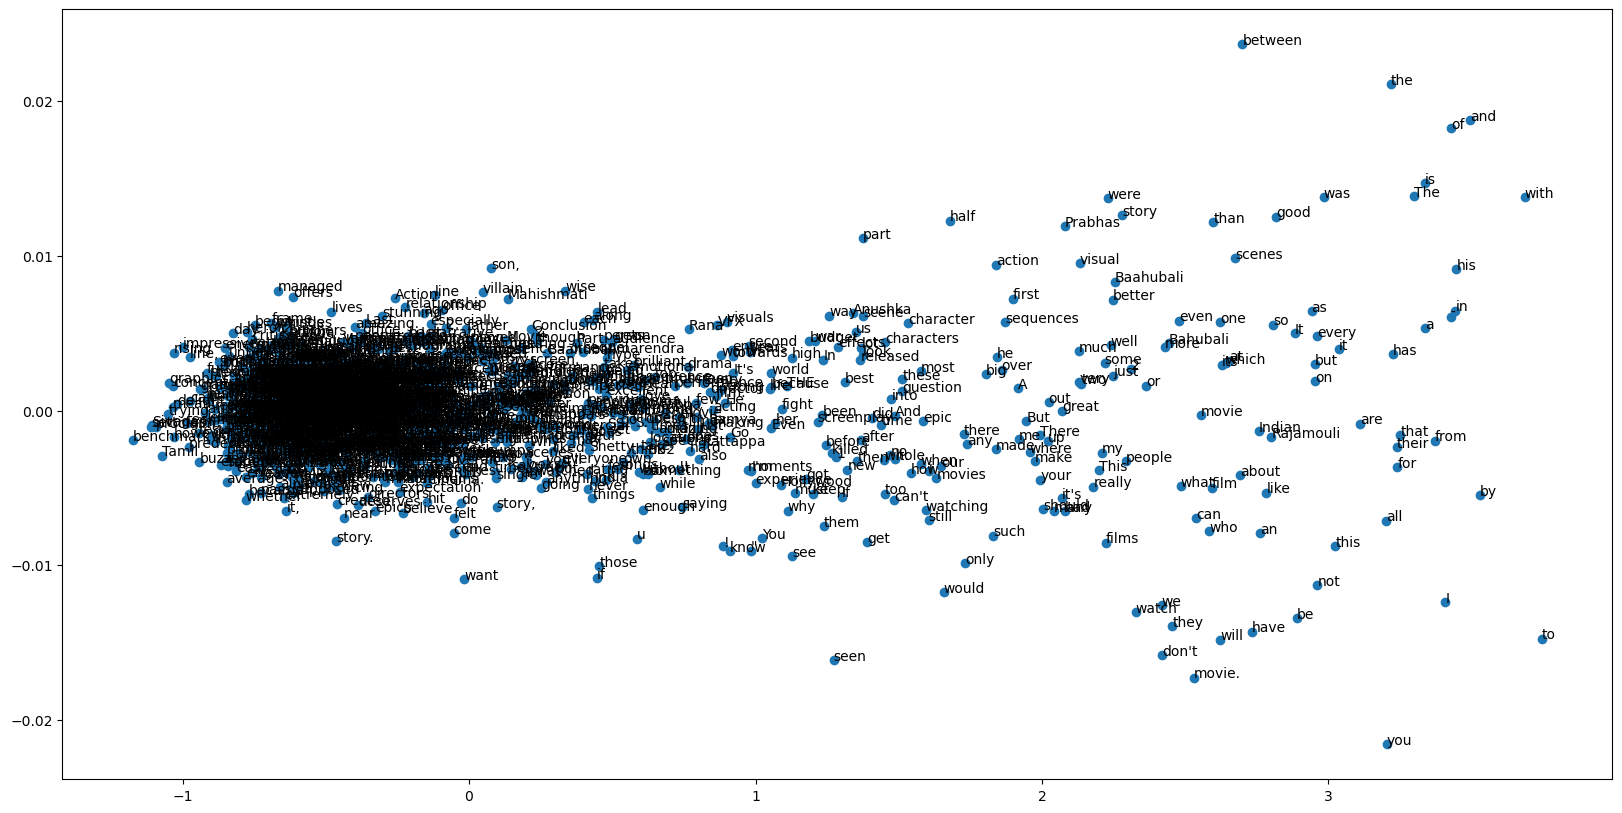

In [ ]:
import matplotlib.pyplot as plt

# Get the list of words
words = list(model2.wv.index_to_key)

# Perform PCA
pca = PCA(n_components=2)
result = pca.fit_transform([model2.wv.get_vector(word) for word in words])

# Plot the scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with its corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.

In [ ]:
# The GitHub link of your final csv file

# Link: https://github.com/SowmyaUshake/Sowmya_INFO5731_Fall2023/blob/main/sample_data_reviwes.csv

